In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load Data ---
# Assuming your data is in a CSV file named 'customer_purchases.csv'.
# If your file is in a different format (e.g., Excel, JSON), adjust pd.read_csv accordingly.
# For demonstration purposes, I'll create a dummy dataset.
try:
    df = pd.read_csv('customer_purchases.csv')
    print("Dataset loaded successfully from 'customer_purchases.csv'.")
except FileNotFoundError:
    print("'customer_purchases.csv' not found. Creating a dummy dataset for demonstration.")
    data = {
        'CustomerID': np.random.randint(1001, 1050, 1000),
        'PurchaseID': np.arange(10001, 11001),
        'PurchaseDate': pd.to_datetime(pd.date_range(start='2023-01-01', periods=1000, freq='H')) + pd.to_timedelta(np.random.randint(0, 3600, 1000), unit='s'),
        'ProductCategory': np.random.choice(['Electronics', 'Apparel', 'Books', 'Home Goods', 'Food'], 1000),
        'ProductName': np.random.choice([f'Product_{i}' for i in range(1, 50)], 1000),
        'Quantity': np.random.randint(1, 6, 1000),
        'UnitPrice': np.round(np.random.uniform(5.0, 500.0, 1000), 2),
        'PaymentMethod': np.random.choice(['Credit Card', 'Debit Card', 'PayPal'], 1000),
        'Region': np.random.choice(['North', 'South', 'East', 'West', 'Central'], 1000)
    }
    df = pd.DataFrame(data)
    # Calculate PurchaseAmount
    df['PurchaseAmount'] = df['Quantity'] * df['UnitPrice']
    # Add some missing values for demonstration
    df.loc[df.sample(frac=0.02).index, 'PurchaseAmount'] = np.nan
    df.loc[df.sample(frac=0.01).index, 'ProductCategory'] = np.nan

'customer_purchases.csv' not found. Creating a dummy dataset for demonstration.


C:\Users\User\AppData\Local\Temp\ipykernel_8324\4217565102.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'PurchaseDate': pd.to_datetime(pd.date_range(start='2023-01-01', periods=1000, freq='H')) + pd.to_timedelta(np.random.randint(0, 3600, 1000), unit='s'),


In [3]:
# --- 2. Initial Data Inspection ---
print("\n--- 2.1 Head of the Dataset ---")
print(df.head())

print("\n--- 2.2 Dataset Information (Data Types, Non-Null Counts) ---")
df.info()

print("\n--- 2.3 Descriptive Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- 2.4 Missing Values Check ---")
print(df.isnull().sum())



--- 2.1 Head of the Dataset ---
   CustomerID  PurchaseID        PurchaseDate ProductCategory ProductName  \
0        1043       10001 2023-01-01 00:54:04            Food  Product_10   
1        1038       10002 2023-01-01 01:37:01     Electronics   Product_9   
2        1034       10003 2023-01-01 02:40:04      Home Goods   Product_4   
3        1036       10004 2023-01-01 03:42:44           Books  Product_25   
4        1038       10005 2023-01-01 04:38:42      Home Goods  Product_35   

   Quantity  UnitPrice PaymentMethod Region  PurchaseAmount  
0         2     381.23        PayPal  South          762.46  
1         5     380.27    Debit Card  South         1901.35  
2         1     347.04   Credit Card   East          347.04  
3         5     330.51        PayPal   West         1652.55  
4         1     237.76        PayPal   East          237.76  

--- 2.2 Dataset Information (Data Types, Non-Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 

In [4]:
# --- 3. Data Cleaning and Preparation ---
# Convert 'PurchaseDate' to datetime objects if not already
if not pd.api.types.is_datetime64_any_dtype(df['PurchaseDate']):
    df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
    print("\n'PurchaseDate' column converted to datetime.")

# Handle missing values in 'PurchaseAmount' (e.g., fill with median or mean, or drop)
# For this exploration, we'll fill with the median to retain rows.
if df['PurchaseAmount'].isnull().any():
    median_purchase_amount = df['PurchaseAmount'].median()
    df['PurchaseAmount'].fillna(median_purchase_amount, inplace=True)
    print(f"\nMissing 'PurchaseAmount' values filled with median: {median_purchase_amount:.2f}")

# Handle missing values in categorical columns (e.g., fill with 'Unknown' or mode)
for col in ['ProductCategory']:
    if df[col].isnull().any():
        df[col].fillna('Unknown', inplace=True)
        print(f"Missing '{col}' values filled with 'Unknown'.")


Missing 'PurchaseAmount' values filled with median: 530.09
Missing 'ProductCategory' values filled with 'Unknown'.


C:\Users\User\AppData\Local\Temp\ipykernel_8324\456431888.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PurchaseAmount'].fillna(median_purchase_amount, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8324\456431888.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c


--- 4.1 Distribution of Purchase Amounts ---


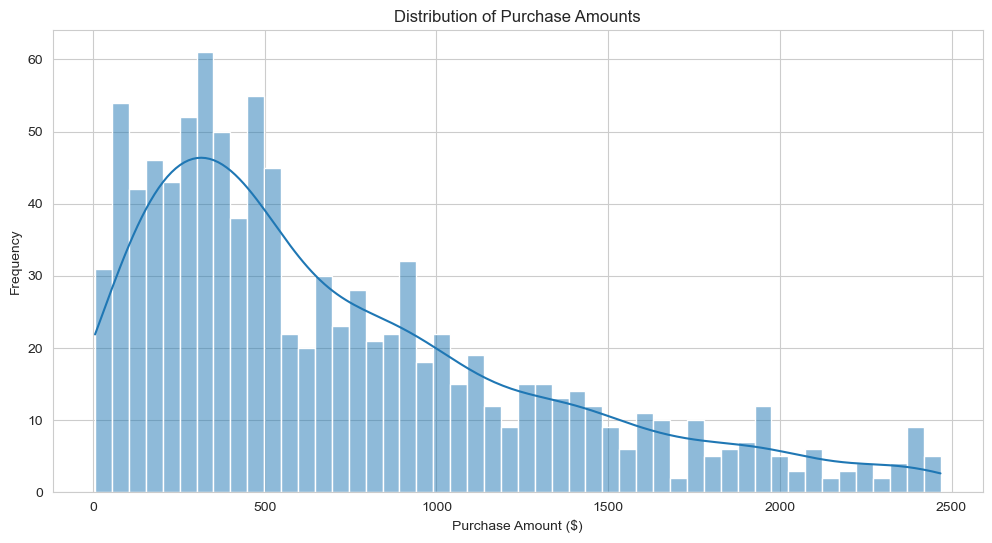


--- 4.2 Purchase Amount by Product Category ---


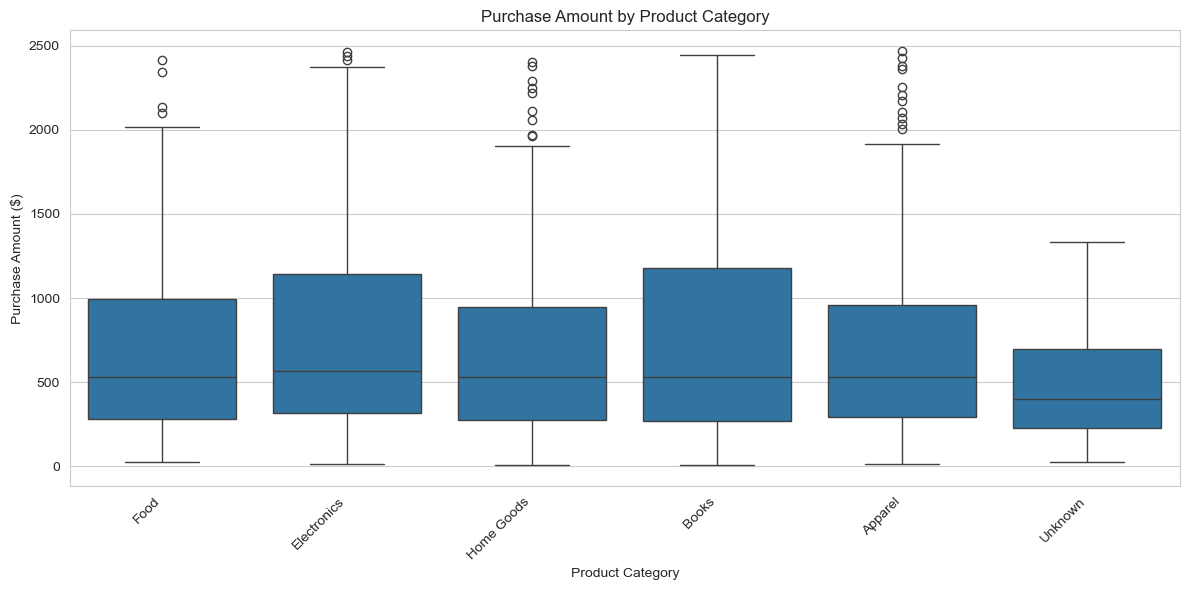


--- 4.3 Daily Sales Trend ---


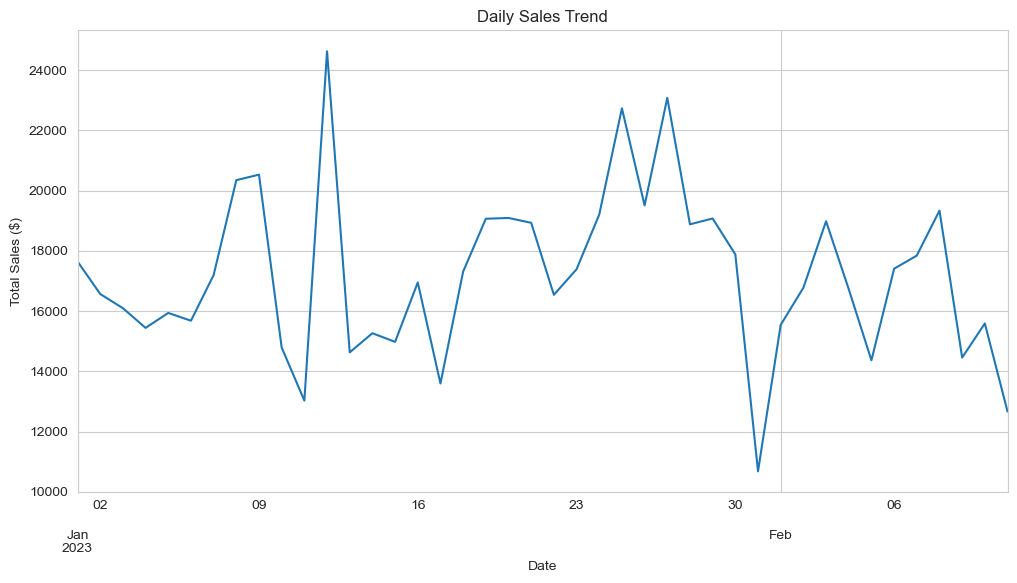


--- 4.4 Top 10 Product Categories by Total Sales ---


C:\Users\User\AppData\Local\Temp\ipykernel_8324\2725092117.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index[:10], y=category_sales.values[:10], palette='viridis')


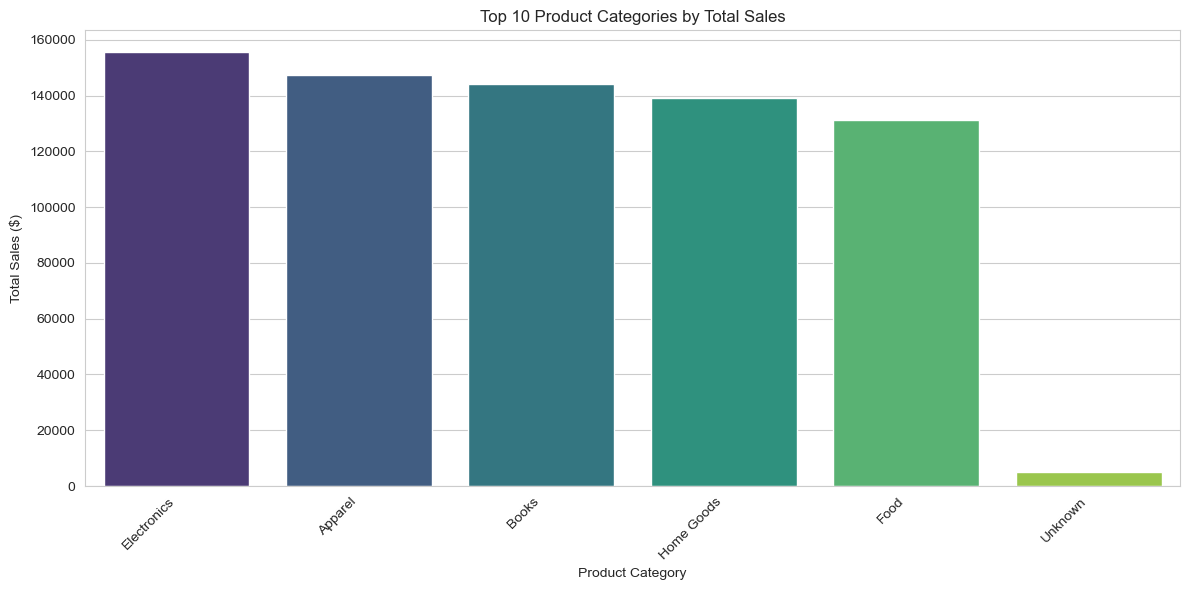


--- 4.5 Top 10 Customers by Total Purchase Amount ---


C:\Users\User\AppData\Local\Temp\ipykernel_8324\2725092117.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.index[:10], y=customer_sales.values[:10], palette='crest')


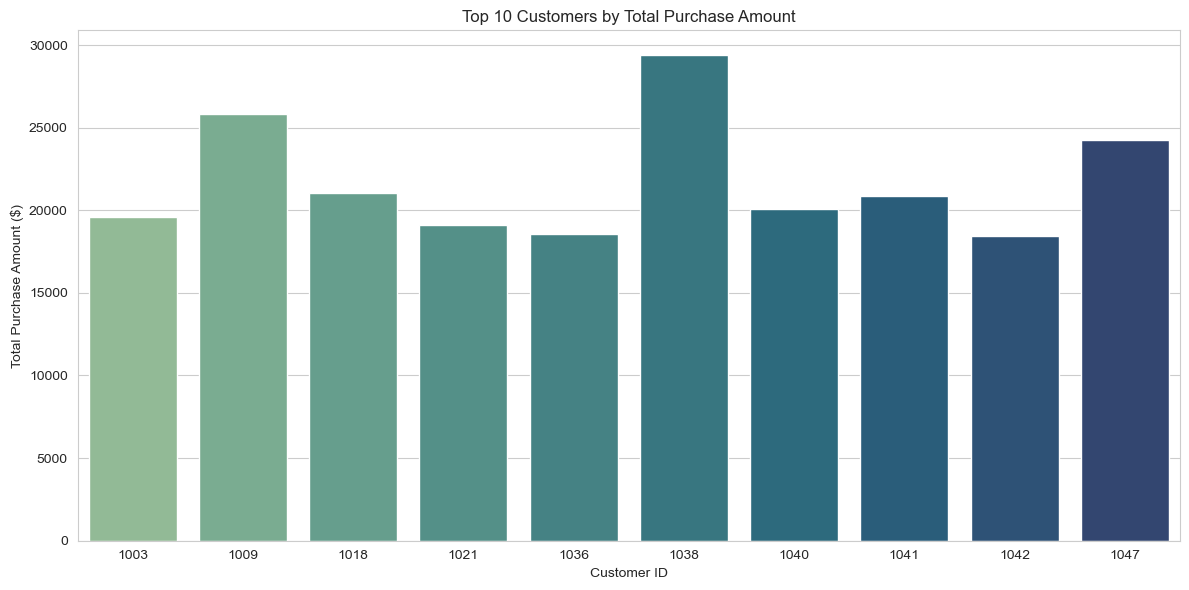

C:\Users\User\AppData\Local\Temp\ipykernel_8324\2725092117.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quantity', data=df, palette='magma')



--- 4.6 Distribution of Quantity per Purchase ---


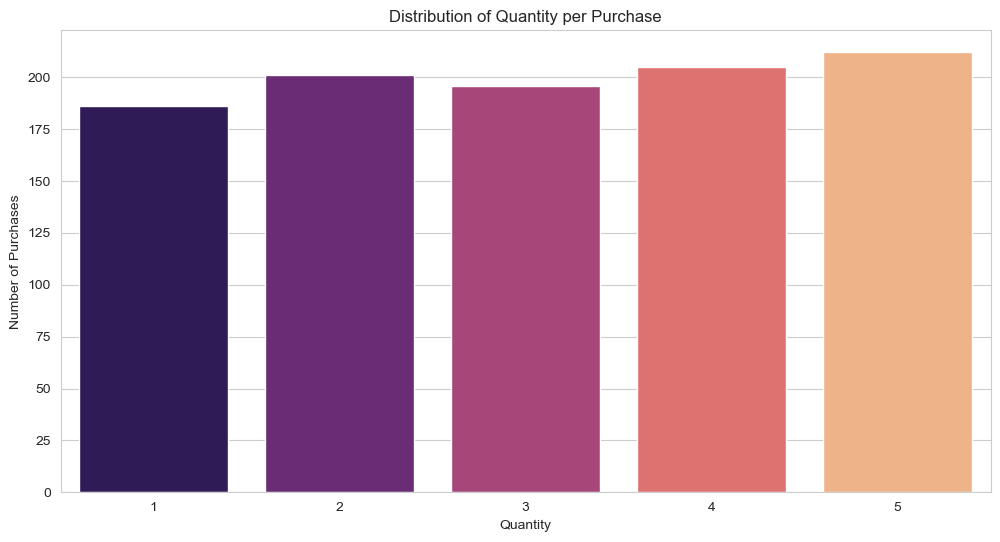


--- 4.7 Purchases by Payment Method ---


C:\Users\User\AppData\Local\Temp\ipykernel_8324\2725092117.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='cubehelix')


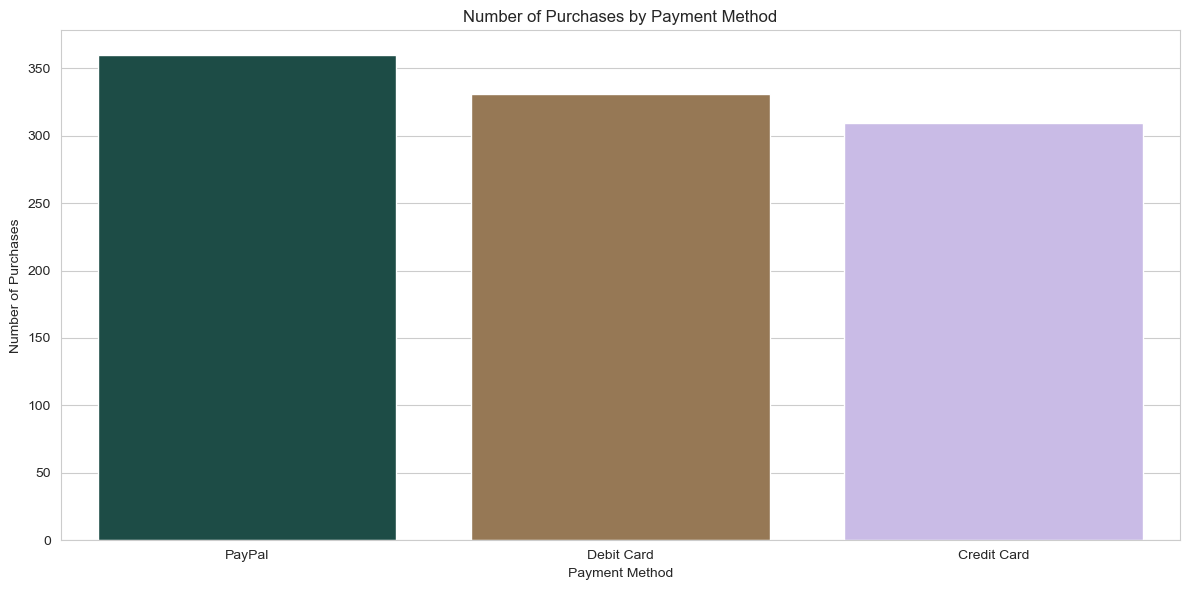

C:\Users\User\AppData\Local\Temp\ipykernel_8324\2725092117.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='plasma')



--- 4.8 Purchases by Region ---


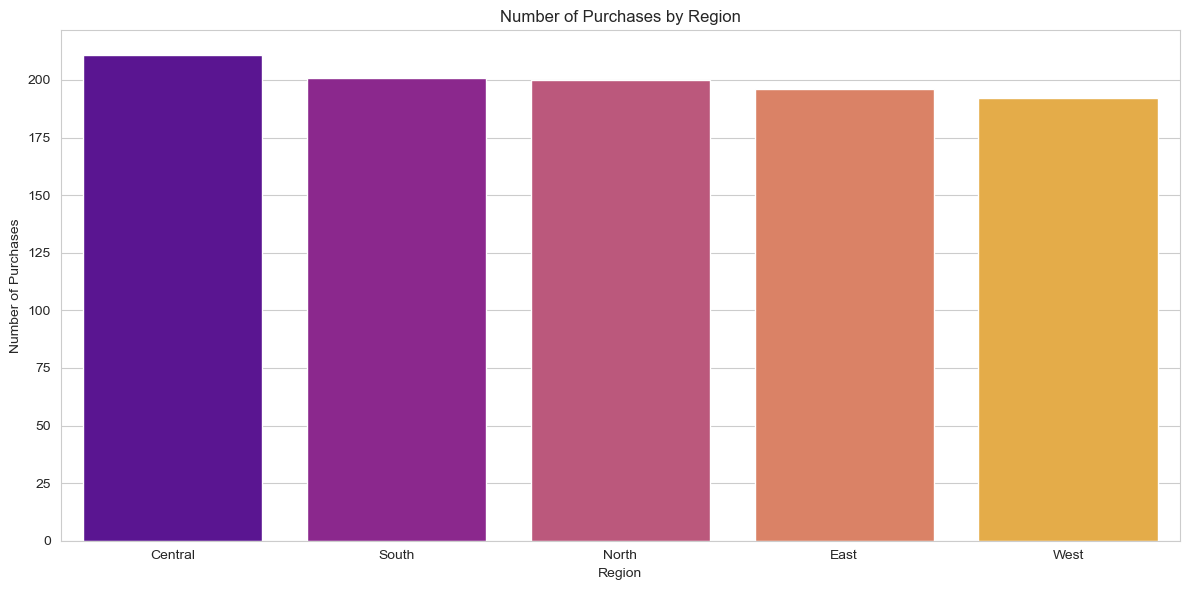


--- 4.9 Correlation Heatmap of Numerical Features (if multiple numerical features exist) ---


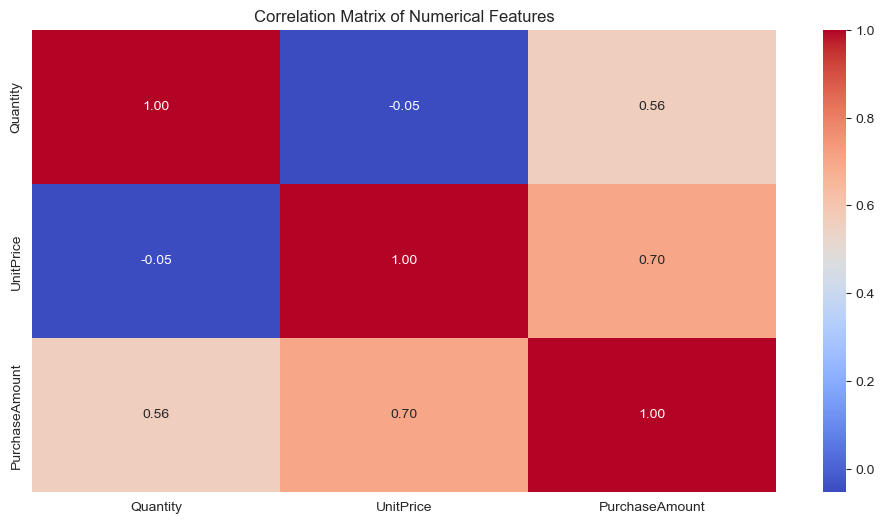


Data exploration complete. Review the generated plots and console outputs for insights.


In [5]:
# --- 4. Exploratory Data Visualization and Analysis ---

# Set a style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Set default figure size

print("\n--- 4.1 Distribution of Purchase Amounts ---")
plt.figure()
sns.histplot(df['PurchaseAmount'], bins=50, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount ($)')
plt.ylabel('Frequency')
plt.show()

print("\n--- 4.2 Purchase Amount by Product Category ---")
plt.figure()
sns.boxplot(x='ProductCategory', y='PurchaseAmount', data=df)
plt.title('Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- 4.3 Daily Sales Trend ---")
# Aggregate daily sales
df['PurchaseDay'] = df['PurchaseDate'].dt.to_period('D')
daily_sales = df.groupby('PurchaseDay')['PurchaseAmount'].sum().to_timestamp()

plt.figure()
daily_sales.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.show()

print("\n--- 4.4 Top 10 Product Categories by Total Sales ---")
category_sales = df.groupby('ProductCategory')['PurchaseAmount'].sum().sort_values(ascending=False)
plt.figure()
sns.barplot(x=category_sales.index[:10], y=category_sales.values[:10], palette='viridis')
plt.title('Top 10 Product Categories by Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- 4.5 Top 10 Customers by Total Purchase Amount ---")
customer_sales = df.groupby('CustomerID')['PurchaseAmount'].sum().sort_values(ascending=False)
plt.figure()
sns.barplot(x=customer_sales.index[:10], y=customer_sales.values[:10], palette='crest')
plt.title('Top 10 Customers by Total Purchase Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount ($)')
plt.tight_layout()
plt.show()

print("\n--- 4.6 Distribution of Quantity per Purchase ---")
plt.figure()
sns.countplot(x='Quantity', data=df, palette='magma')
plt.title('Distribution of Quantity per Purchase')
plt.xlabel('Quantity')
plt.ylabel('Number of Purchases')
plt.show()

print("\n--- 4.7 Purchases by Payment Method ---")
payment_method_counts = df['PaymentMethod'].value_counts()
plt.figure()
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='cubehelix')
plt.title('Number of Purchases by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

print("\n--- 4.8 Purchases by Region ---")
region_counts = df['Region'].value_counts()
plt.figure()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='plasma')
plt.title('Number of Purchases by Region')
plt.xlabel('Region')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

print("\n--- 4.9 Correlation Heatmap of Numerical Features (if multiple numerical features exist) ---")
# For this dummy dataset, we only have Quantity, UnitPrice, PurchaseAmount.
# Let's see the correlation between Quantity, UnitPrice, and PurchaseAmount (which is derived)
numerical_df = df[['Quantity', 'UnitPrice', 'PurchaseAmount']]
correlation_matrix = numerical_df.corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("\nData exploration complete. Review the generated plots and console outputs for insights.")
